 # COVID-19 Portfolio Analysis Update 2.0, Using Modern Portfolio Theory (MPT)
 
Modern portfolio theory (MPT) is a theory on how risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. According to the theory, it's possible to construct an "efficient frontier" of optimal portfolios offering the maximum possible expected return for a given level of risk.

MPT shows that an investor can construct a portfolio of multiple assets that will maximize returns for a given level of risk. Likewise, given a desired level of expected return, an investor can construct a portfolio with the lowest possible risk. Based on statistical measures such as variance and correlation, an individual investment's return is less important than how the investment behaves in the context of the entire portfolio.

##### Stocks mentioned in this portfolio should not be taken as a recommendation to buy or sell any security. This portfolio was created for perspective research only using Financial Engineering strategies for portfolio management and optimization, taking the data and making a story. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

pd.options.display.float_format = '{:.2f}'.format

In [2]:
COVID19_Stocks = pd.read_csv("COVID19_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]

Gathering stock data since the market bottom from 2020-3-23 to recent close:

In [3]:
COVID19_Stocks = COVID19_Stocks.loc["2020-3-23":"2020-5-29"]

In [4]:
COVID19_Stocks.tail().dropna()

,AAPL,AMZN,BLK,CMG,CRM,ENPH,GOOGL,HRL,JNJ,KO,...,NKE,NOC,PEP,PG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-22,318.89,2436.88,513.30,1055.70,177.85,56.42,1413.24,46.93,144.37,45.03,...,93.52,324.53,130.48,112.60,825.17,311.19,81.49,816.88,190.86,98.92
2020-05-26,316.73,2421.86,523.63,1017.00,176.52,58.43,1421.37,45.73,144.56,46.09,...,96.38,322.82,129.75,112.03,767.89,312.34,80.79,818.87,193.22,101.60
2020-05-27,318.11,2410.39,536.40,990.00,176.60,57.86,1420.28,46.93,144.89,46.73,...,99.62,341.53,130.81,113.89,750.00,315.43,81.02,820.23,192.82,104.30
2020-05-28,318.25,2401.10,536.84,995.09,181.10,55.80,1418.24,47.88,146.97,47.09,...,98.21,341.28,132.29,116.06,744.43,318.80,79.62,805.81,194.26,106.50


In [5]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Daily Returns since the impact of COVID-19:

In [6]:
ret = COVID19_Stocks.pct_change().dropna()

In [7]:
ret.tail().dropna()

,AAPL,AMZN,BLK,CMG,CRM,ENPH,GOOGL,HRL,JNJ,KO,...,NKE,NOC,PEP,PG,SHOP,SPGI,SQ,TSLA,V,WM
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-22,0.01,-0.00,0.01,0.03,0.01,-0.06,0.00,0.02,-0.01,-0.00,...,-0.01,-0.01,0.00,0.01,0.03,0.00,0.00,-0.01,0.00,-0.00
2020-05-26,-0.01,-0.01,0.02,-0.04,-0.01,0.04,0.01,-0.03,0.00,0.02,...,0.03,-0.01,-0.01,-0.01,-0.07,0.00,-0.01,0.00,0.01,0.03
2020-05-27,0.00,-0.00,0.02,-0.03,0.00,-0.01,-0.00,0.03,0.00,0.01,...,0.03,0.06,0.01,0.02,-0.02,0.01,0.00,0.00,-0.00,0.03
2020-05-28,0.00,-0.00,0.00,0.01,0.03,-0.04,-0.00,0.02,0.01,0.01,...,-0.01,-0.00,0.01,0.02,-0.01,0.01,-0.02,-0.02,0.01,0.02
2020-05-29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Risk and Return due to the impact of COVID-19:

In [8]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,1.99,0.44
AMZN,1.32,0.39
BLK,2.88,0.67
CMG,3.02,0.63
CRM,1.52,0.56
ENPH,4.48,1.20
GOOGL,1.70,0.46
HRL,0.76,0.37
JNJ,1.61,0.37
KO,1.31,0.45


Risk/Return Analysis: The stock in the his portoflio with the highest risk include ENPH and the stock with the highest return is ENPH. A question we should always be asking ourselves when entering a new position, "is the risk worth the potential reward?". 

Plot Risk and Returns:

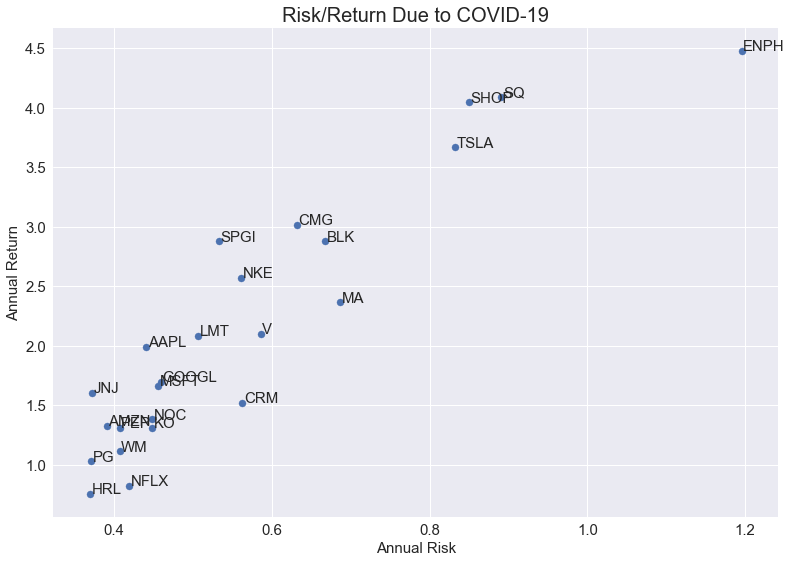

In [9]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Annual Risk", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Number of assets in the portfolio (24), and 200,000 simulations of portfolios:

In [10]:
noa = len(COVID19_Stocks.columns)
nop = 200000
print(noa, nop)

24 200000


Creating simulation:

In [11]:
np.random.seed(123)
matrix = np.random.random(noa * nop).reshape(nop, noa)

200,000 different weight combinations for each stock in the portfolio:

In [12]:
weights = matrix / matrix.sum(axis = 1, keepdims= True)
weights

array([[0.05621608, 0.02309597, 0.0183105 , ..., 0.06856258, 0.05847501,
        0.04931926],
       [0.0624337 , 0.02791017, 0.03126585, ..., 0.0216444 , 0.04174392,
        0.08517227],
       [0.04124858, 0.04866555, 0.00957825, ..., 0.04545469, 0.00759984,
        0.07029744],
       ...,
       [0.07952194, 0.01936026, 0.02380503, ..., 0.03438304, 0.00224981,
        0.07849235],
       [0.00066326, 0.05510523, 0.06314183, ..., 0.00555609, 0.0550163 ,
        0.0542212 ],
       [0.07721799, 0.00398494, 0.00649352, ..., 0.07718165, 0.0379191 ,
        0.01683982]])

In [13]:
weights.sum(axis = 1, keepdims= True)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

Daily Returns of 200,000 portfolios:

In [14]:
port_ret = ret.dot(weights.T)

In [15]:
port_ret.tail().dropna()

,0,1,2,3,4,5,6,7,8,9,...,199990,199991,199992,199993,199994,199995,199996,199997,199998,199999
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-22,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00
2020-05-26,-0.00,0.00,-0.00,-0.01,0.00,0.00,-0.00,0.00,-0.00,-0.00,...,-0.01,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.01
2020-05-27,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
2020-05-28,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2020-05-29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Annual Risk and Return of 200,000 Portfolios

In [16]:
port_summary = ann_risk_return(port_ret)

In [17]:
port_summary.tail().dropna()

,Return,Risk
199995,2.16,0.42
199996,2.22,0.43
199997,1.96,0.38
199998,2.03,0.40
199999,2.09,0.40


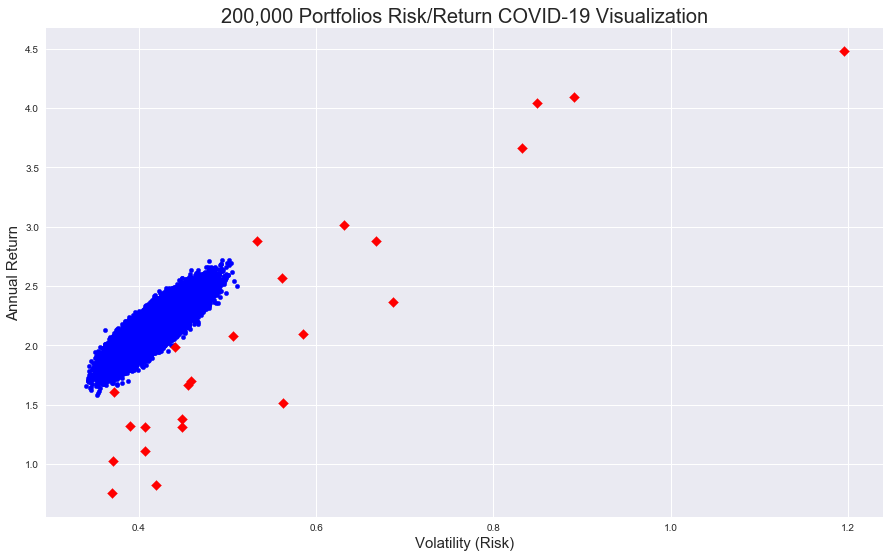

In [18]:
plt.figure(figsize = (15, 9))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"],s= 20, color = "blue")
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"], s= 50, color = "red", marker = "D")
plt.xlabel('Volatility (Risk)', fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("200,000 Portfolios Risk/Return COVID-19 Visualization", fontsize = 20)
plt.show()

## Portfolio Analysis With The Sharpe Ratio

Used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

Since the Portfolio is from March 23 2020 to May 29 2020, we're going to be using the 3 month government bond as the Risk Free Rate, which is at 0.13% during the time when I checked the treasury yield making this case study. https://www.bloomberg.com/markets/rates-bonds/government-bonds/us use this website to track the treasury yields.

In [19]:
risk_free_return = 0.013
risk_free_risk = 0

In [20]:
rf = [risk_free_return, risk_free_risk]
rf

[0.013, 0]

Sharpe Ratios for stocks in the portfolio:

In [21]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,1.99,0.44,4.48
AMZN,1.32,0.39,3.36
BLK,2.88,0.67,4.29
CMG,3.02,0.63,4.76
CRM,1.52,0.56,2.67
ENPH,4.48,1.20,3.73
GOOGL,1.70,0.46,3.67
HRL,0.76,0.37,2.01
JNJ,1.61,0.37,4.28
KO,1.31,0.45,2.90


Stock Sharpe Ratio Analysis: Notice that the stocks all have positive values for the sharpe ratio. This mean's we are expecting gains from these stocks.

Portfolio Sharpe Ratios: having a porfolio sharpe ratio above 1 is ideal to have

In [22]:
port_summary["Sharpe"] = (port_summary["Return"].sub(rf[0]))/port_summary["Risk"]

In [23]:
port_summary.tail().dropna()

,Return,Risk,Sharpe
199995,2.16,0.42,5.07
199996,2.22,0.43,5.10
199997,1.96,0.38,5.07
199998,2.03,0.40,5.02
199999,2.09,0.40,5.20


Results of 200,000 porfolios simulations:

In [24]:
port_summary.describe()

,Return,Risk,Sharpe
count,200000.00,200000.00,200000.00
mean,2.15,0.41,5.16
std,0.13,0.02,0.16
min,1.58,0.34,4.34
25%,2.07,0.40,5.06
50%,2.15,0.41,5.16
75%,2.24,0.43,5.27
max,2.72,0.51,5.84


out of 200,000 portfolio simulations, our maximum results lead to an 2.72% return, 0.51% risk and sharpe ratio of 5.84. The best performing portfolios usually have a Sharpe Ratios with 1 or above which is ideal to look for. In over all return of this portfolio combination is greater then risk. 

Plot 200,000 Portfolio Sharpe Ratio Performances. "vmin" comes from "25%", "vmax" comes from max sharpe ratio, and "alpha" comes from "max return" this is also a trial and error process to get the most out of the chart. data inputs comform the describe chart.

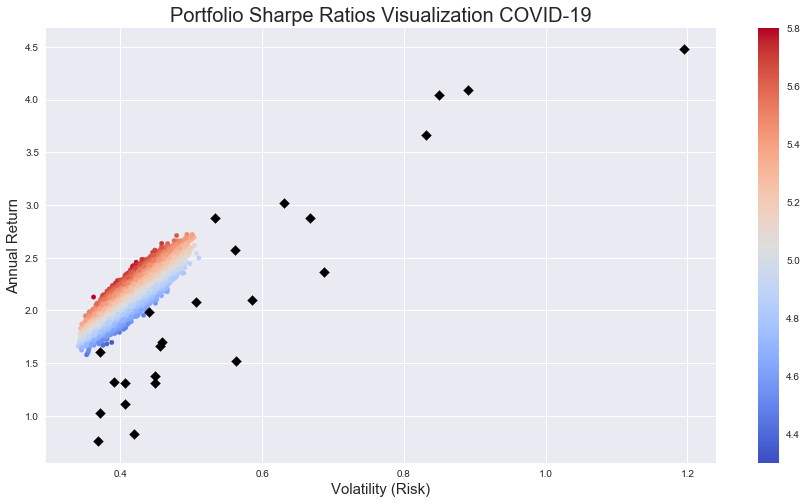

In [25]:
plt.figure(figsize = (15, 8))
plt.scatter(port_summary.loc[:, "Risk"], port_summary.loc[:, "Return"], s= 20, 
            c = port_summary.loc[:, "Sharpe"], cmap = "coolwarm", vmin = 4.3, vmax = 5.8, alpha = 2.7)
plt.colorbar()
plt.scatter(summary.loc[:, "Risk"], summary.loc[:, "Return"],s= 50, marker = "D", c = "black")
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Portfolio Sharpe Ratios Visualization COVID-19", fontsize = 20)
plt.show()

## The Optimal Portfolio - "Max Sharpe Ratio Portfolio"

Out of 200,000 simulated allocations, the "best portfolio" is portfolio 126,254:

In [26]:
msrp = port_summary.Sharpe.idxmax()
msrp

126254

Results of the Max Sharpe Ratio Portfolio:

In [27]:
port_summary.loc[msrp]

Return   2.13
Risk     0.36
Sharpe   5.84
Name: 126254, dtype: float64

The "optimal weights" of the portfolio:

In [28]:
msrp_w = weights[msrp, :]
msrp_w

array([0.0162155 , 0.02565127, 0.0188653 , 0.10075059, 0.00641637,
       0.0008126 , 0.00935971, 0.04139931, 0.04573422, 0.0066108 ,
       0.10121046, 0.00247679, 0.01396377, 0.10399988, 0.01713534,
       0.04638309, 0.02192569, 0.11006399, 0.05844009, 0.09111005,
       0.02058503, 0.08727004, 0.02247775, 0.03114234])

out of 200,000 portfolio, "The Best Portfolio" consist of the following combinations:

In [29]:
pd.Series(index = COVID19_Stocks.columns, data = msrp_w)

AAPL    0.02
AMZN    0.03
BLK     0.02
CMG     0.10
CRM     0.01
ENPH    0.00
GOOGL   0.01
HRL     0.04
JNJ     0.05
KO      0.01
LMT     0.10
MA      0.00
MSFT    0.01
NFLX    0.10
NKE     0.02
NOC     0.05
PEP     0.02
PG      0.11
SHOP    0.06
SPGI    0.09
SQ      0.02
TSLA    0.09
V       0.02
WM      0.03
dtype: float64

"Best Portfolio" Analysis: Notice the optimal portfolio, has 0% ENPH and 0% MA allocations.

###  Finding the "absolute optimal portfolio" with scipy, an optimization algorithm

In [30]:
import pandas as pd
import numpy as np
import scipy.optimize as sco
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress = True)

Risk Free Rate:

In [31]:
rf = 0.013

Annualized portfolio return (based on weights):

In [32]:
def port_ret(weights):
    return ret.dot(weights.T).mean() * 252

Annualized portfolio volatility (based on weights):

In [33]:
def port_vol(weights):
    return ret.dot(weights.T).std() * np.sqrt(252)

In [34]:
def min_func_sharpe(weights): 
     return (rf - port_ret(weights)) / port_vol(weights) #sharpe ratio * (-1)

Number of assets in the portfolio:

In [35]:
noa = len(ret.columns)
noa

24

In order to find the absolute optimal portfolio we must set all stocks to equal weights:

In [36]:
eweigths = np.full(noa, 1/noa)
eweigths

array([0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.04166667, 0.04166667,
       0.04166667, 0.04166667, 0.04166667, 0.04166667])

In [37]:
cons = ({"type": "eq", "fun": lambda x: np.sum(x) - 1})

In [38]:
bnds =  tuple((0,1) for x in range(noa))

Optimization based on function to be minimized, starting with equal weights and based on respective bounds and constraints:

In [39]:
opts = sco.minimize(min_func_sharpe, eweigths, method = "SLSQP", bounds = bnds, constraints= cons)
opts

     fun: -6.440647716521449
     jac: array([ 0.95642263,  0.00931883,  0.46993691, -0.0313108 ,  3.34036535,
        0.60006374,  1.14858788,  0.30946791,  0.02295148,  1.62041891,
       -0.03103721,  2.40007609,  1.85020363, -0.0328272 ,  1.10902417,
        1.23356223,  1.3201943 ,  0.37009001, -0.0331015 , -0.03203118,
        0.82321674, -0.03232116,  2.11128277,  1.25957155])
 message: 'Optimization terminated successfully.'
    nfev: 266
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.        , 0.        , 0.        , 0.06957102, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.23317173, 0.        , 0.        , 0.16567178, 0.        ,
       0.        , 0.        , 0.        , 0.15226956, 0.27273805,
       0.        , 0.10657786, 0.        , 0.        ])

In [40]:
optimal_weights = opts["x"]
optimal_weights

array([0.        , 0.        , 0.        , 0.06957102, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.23317173, 0.        , 0.        , 0.16567178, 0.        ,
       0.        , 0.        , 0.        , 0.15226956, 0.27273805,
       0.        , 0.10657786, 0.        , 0.        ])

The "Absolute Optimal Weight" (%) provide the following alloctions in each stock:

In [41]:
optimal_weights = pd.Series(index = COVID19_Stocks.columns, data = optimal_weights)
optimal_weights

AAPL    0.0000
AMZN    0.0000
BLK     0.0000
CMG     0.0696
CRM     0.0000
ENPH    0.0000
GOOGL   0.0000
HRL     0.0000
JNJ     0.0000
KO      0.0000
LMT     0.2332
MA      0.0000
MSFT    0.0000
NFLX    0.1657
NKE     0.0000
NOC     0.0000
PEP     0.0000
PG      0.0000
SHOP    0.1523
SPGI    0.2727
SQ      0.0000
TSLA    0.1066
V       0.0000
WM      0.0000
dtype: float64

Absolute Optimization Analysis: Notice now after using an optimization algorithm to achive the "absolute best portfolio" out of the 200,000 combinations the result include, 0% in the following stocks AAPL, AMZN, BLK, CRM, ENPH, GOOGL, HRL, JNJ, KO, MA, MSFT, NKE, NOC, PEP, PG, SQ, V, WM and V. Although we used an optimization algorithm, that does not mean the "Absolute optimization" is 100% correct. Therefore the optimizations are too give you a perspective of the allocations in each stock. 

Optimizations Analysis: Since the "absolute optimization" Analysis is not as well diversifed with it's allocations compared to the first optimization finding the "best portfolio", we could develope a new alloction using the data. instad of giving CMG and NFLX 10% according to the "best portfolio" we could take off 5% from them and give 5% to MA and to add 5% to MSFT. Which could make the portfolio a bit more balance. The Optimization are all about perpective, and aren't always 100% correct.  

MSRP = Max Sharpe Ratio Portfolio:

In [42]:
ret['MSRP'] = ret.dot(optimal_weights)

Dailty Returns of stocks compared to MSRP

In [43]:
ret.tail()

,AAPL,AMZN,BLK,CMG,CRM,ENPH,GOOGL,HRL,JNJ,KO,...,NOC,PEP,PG,SHOP,SPGI,SQ,TSLA,V,WM,MSRP
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-22,0.0064,-0.0040,0.0094,0.0282,0.0148,-0.0586,0.0046,0.0200,-0.0091,-0.0031,...,-0.0067,0.0021,0.0088,0.0284,0.0035,0.0000,-0.0130,0.0013,-0.0001,0.0034
2020-05-26,-0.0068,-0.0062,0.0201,-0.0367,-0.0075,0.0356,0.0058,-0.0256,0.0013,0.0235,...,-0.0053,-0.0056,-0.0051,-0.0694,0.0037,-0.0086,0.0024,0.0124,0.0271,-0.0154
2020-05-27,0.0044,-0.0047,0.0244,-0.0265,0.0005,-0.0098,-0.0008,0.0262,0.0023,0.0139,...,0.0580,0.0082,0.0166,-0.0233,0.0099,0.0028,0.0017,-0.0021,0.0266,0.0151
2020-05-28,0.0004,-0.0039,0.0008,0.0051,0.0255,-0.0356,-0.0014,0.0202,0.0144,0.0077,...,-0.0007,0.0113,0.0191,-0.0074,0.0107,-0.0173,-0.0176,0.0075,0.0211,-0.0015
2020-05-29,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Risk and Return including the Max Sharpe Ratio Portfolio:

In [44]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,1.9885,0.4409
AMZN,1.3248,0.3904
BLK,2.8771,0.6674
CMG,3.0171,0.6315
CRM,1.5180,0.5627
ENPH,4.4778,1.1955
GOOGL,1.6970,0.4593
HRL,0.7568,0.3692
JNJ,1.6057,0.3717
KO,1.3125,0.4484


Notice that the MSRP has a return of 2.62 with a risk of 0.40. which is far exceeding the the potential risk.

## Including the Market Portfolio

A market portfolio is a theoretical bundle of investments that includes every type of asset available in the investment universe, with each asset weighted in proportion to its total presence in the market. The expected return of a market portfolio is identical to the expected return of the market as a whole.

A market portfolio, by nature of being completely diversified, is subject only to systematic risk, or risk that affects the market as a whole, and not to unsystematic risk, which is the risk inherent to a particular asset class. In this case study we will be using the S&P 500 Index as the Market Portfolio.

In [45]:
COVID19_Stocks = pd.read_csv("COVID19_Stocks.csv", header = [0,1], index_col = [0], parse_dates = [0])["Adj Close"]
SP500_Index =  pd.read_csv("SP500.csv", index_col = "Date", parse_dates = ["Date"])["Adj Close"].to_frame()

In [46]:
COVID19_Stocks = COVID19_Stocks.loc["2020-3-23":"2020-5-29"]
SP500_Index = SP500_Index.loc["2020-3-23":"2020-5-29"]

Closing Prices of the S&P 500 index:

In [47]:
SP500_Index.tail().dropna()

,Adj Close
Date,
2020-05-21,2948.5100
2020-05-22,2955.4500
2020-05-26,2991.7700
2020-05-27,3036.1299
2020-05-28,3029.7300


In [48]:
COVID19_Stocks["MP"] = SP500_Index["Adj Close"]

Closing Prices of the stocks including the Market Portfolio:

In [49]:
COVID19_Stocks.tail().dropna()

,AAPL,AMZN,BLK,CMG,CRM,ENPH,GOOGL,HRL,JNJ,KO,...,NOC,PEP,PG,SHOP,SPGI,SQ,TSLA,V,WM,MP
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-22,318.8900,2436.8799,513.3000,1055.7000,177.8500,56.4200,1413.2400,46.9300,144.3700,45.0300,...,324.5312,130.4800,112.6000,825.1700,311.1900,81.4900,816.8800,190.8600,98.9200,2955.4500
2020-05-26,316.7300,2421.8601,523.6300,1017.0000,176.5200,58.4300,1421.3700,45.7300,144.5600,46.0900,...,322.8185,129.7500,112.0300,767.8900,312.3400,80.7900,818.8700,193.2200,101.6000,2991.7700
2020-05-27,318.1100,2410.3899,536.4000,990.0000,176.6000,57.8600,1420.2800,46.9300,144.8900,46.7300,...,341.5290,130.8100,113.8900,750.0000,315.4300,81.0200,820.2300,192.8200,104.3000,3036.1299
2020-05-28,318.2500,2401.1001,536.8400,995.0900,181.1000,55.8000,1418.2400,47.8800,146.9700,47.0900,...,341.2800,132.2900,116.0600,744.4300,318.8000,79.6200,805.8100,194.2600,106.5000,3029.7300


Daily Returns Including the Market Portfolio:

In [51]:
ret = COVID19_Stocks.pct_change().dropna() 
# ret, when inputting "ret" it'll bring up a list of the daily returns

In [52]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

Risk and Return of the stocks including the Market Portfolio due to COVID-19:

In [53]:
summary = ann_risk_return(ret)
summary

,Return,Risk
AAPL,1.9885,0.4409
AMZN,1.3248,0.3904
BLK,2.8771,0.6674
CMG,3.0171,0.6315
CRM,1.5180,0.5627
ENPH,4.4778,1.1955
GOOGL,1.6970,0.4593
HRL,0.7568,0.3692
JNJ,1.6057,0.3717
KO,1.3125,0.4484


Risk/Return Including the Market Portfolio:

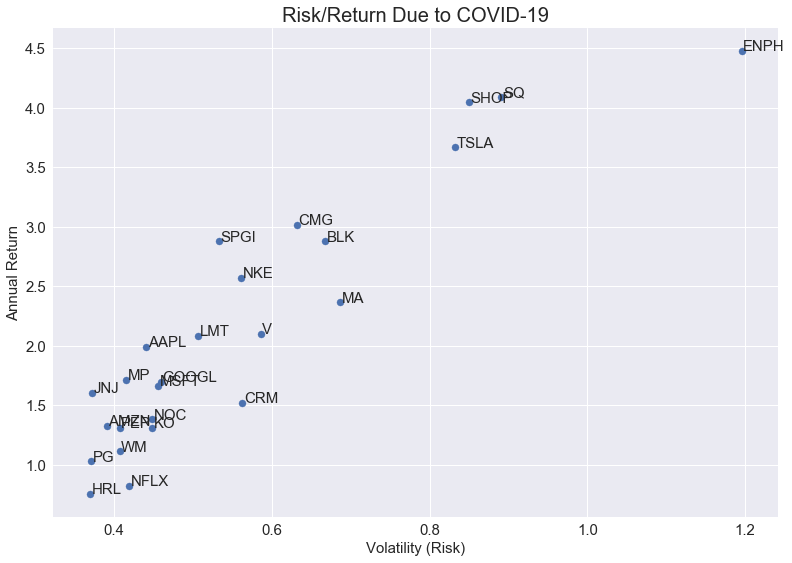

In [54]:
summary.plot(kind = "scatter", x = "Risk", y = "Return", figsize = (13,9), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size = 15)
plt.xlabel("Volatility (Risk)", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Risk/Return Due to COVID-19", fontsize = 20)
plt.show()

Calculating the Sharpe Ratio including the Market Portfolio (MP):

In [55]:
risk_free_return = 0.013
risk_free_risk = 0

In [56]:
rf = [risk_free_return, risk_free_risk]
rf

[0.013, 0]

Sharpe Ratio of stocks and the Market Portfolio:

In [57]:
summary["Sharpe"] = (summary["Return"].sub(rf[0]))/summary["Risk"]
summary

,Return,Risk,Sharpe
AAPL,1.9885,0.4409,4.4806
AMZN,1.3248,0.3904,3.3599
BLK,2.8771,0.6674,4.2915
CMG,3.0171,0.6315,4.7568
CRM,1.5180,0.5627,2.6748
ENPH,4.4778,1.1955,3.7346
GOOGL,1.6970,0.4593,3.6661
HRL,0.7568,0.3692,2.0148
JNJ,1.6057,0.3717,4.2849
KO,1.3125,0.4484,2.8981


Notice that the Market Porfolo has a positive sharpe ratio, this generally moves we're expecting positive returns.

## Systematic and Unsystematic Risk  Including the Market Portfolio

Systematic risk refers to the risk inherent to the entire market or market segment. Systematic risk, also known as “undiversifiable risk,” “volatility” or “market risk,” affects the overall market, not just a particular stock or industry. This type of risk is both unpredictable and impossible to completely avoid. It cannot be mitigated through diversification, only through hedging or by using the correct asset allocation strategy.

Unsystematic risk is unique to a specific company or industry. Also known as “nonsystematic risk,” "specific risk," "diversifiable risk" or "residual risk," in the context of an investment portfolio, unsystematic risk can be reduced through diversification.

In [58]:
summary["TotalRisk_var"] = np.power(summary.Risk, 2)
summary

,Return,Risk,Sharpe,TotalRisk_var
AAPL,1.9885,0.4409,4.4806,0.1944
AMZN,1.3248,0.3904,3.3599,0.1524
BLK,2.8771,0.6674,4.2915,0.4454
CMG,3.0171,0.6315,4.7568,0.3988
CRM,1.5180,0.5627,2.6748,0.3166
ENPH,4.4778,1.1955,3.7346,1.4293
GOOGL,1.6970,0.4593,3.6661,0.2110
HRL,0.7568,0.3692,2.0148,0.1363
JNJ,1.6057,0.3717,4.2849,0.1382
KO,1.3125,0.4484,2.8981,0.2011


In statistics, covariance is a metric used to measure how one random variable moves in relation to another random variable. In investment, covariance of returns measures how the rate of return on one asset varies in relation to the rate of return on other assets or a portfolio.

In [59]:
COV = ret.cov()*252
# COV, if we add "COV" it'll create a long chart

In [60]:
summary["SystRisk_var"] = COV.iloc[:, -1]

In [61]:
summary["UnsystRisk_var"] = summary["TotalRisk_var"].sub(summary["SystRisk_var"])
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var
AAPL,1.9885,0.4409,4.4806,0.1944,0.1627,0.0317
AMZN,1.3248,0.3904,3.3599,0.1524,0.0798,0.0727
BLK,2.8771,0.6674,4.2915,0.4454,0.2222,0.2233
CMG,3.0171,0.6315,4.7568,0.3988,0.1941,0.2047
CRM,1.5180,0.5627,2.6748,0.3166,0.1932,0.1234
ENPH,4.4778,1.1955,3.7346,1.4293,0.3125,1.1168
GOOGL,1.6970,0.4593,3.6661,0.2110,0.1606,0.0504
HRL,0.7568,0.3692,2.0148,0.1363,0.0691,0.0672
JNJ,1.6057,0.3717,4.2849,0.1382,0.1171,0.0210
KO,1.3125,0.4484,2.8981,0.2011,0.1587,0.0424


### Systematic and Unsystematic risk of stocks including the Market Portfolio (MP = S&P500 Index):

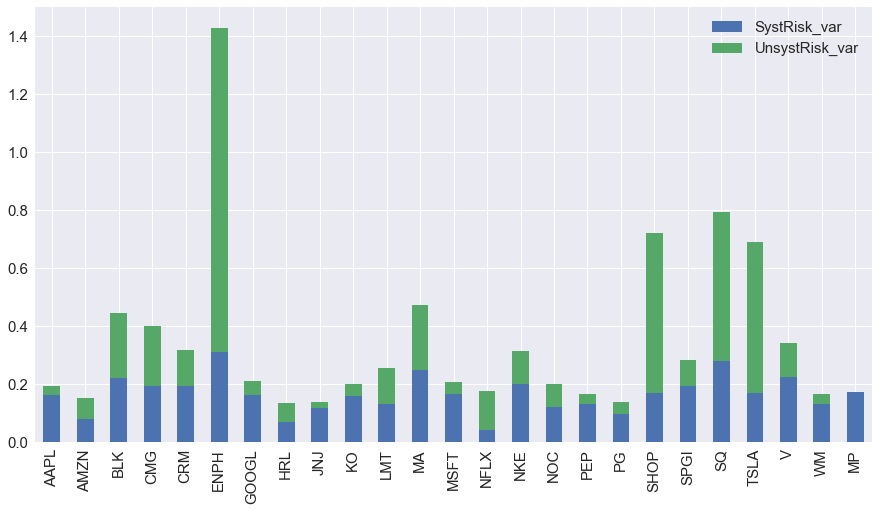

In [62]:
summary.iloc[:, 4:].plot(kind = "bar", stacked = True, figsize= (15, 8), fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In general we want a balance between systematic and unsystematic risk. Systematic risk has to do with the stock getting affected by the overall market, and the stocks in this portfolio that gets affected by the market condidtions the most due to COVID-19 are AAPL, SPGI, GOOGL, WM, PG, PEP, MSFT, JNJ, and KO. The stocks that have the highest Unsystematic risk also company specific risk are ENPH SHOP, SQ, MA, and TSLA. HRL, AMZN, BLK, and LMT seem to have a decent balance between systematic and unsystematic risk. 

Determining the beta of the stocks in the portfolio compared to the Market Portfolio (S&P 500 Index):

Beta is a measure of the volatility (Risk), or systematic risk, of a security or portfolio, in comparison to the market as a whole. 

In [63]:
summary["beta"] = summary.SystRisk_var / summary.loc["MP", "SystRisk_var"]
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta
AAPL,1.9885,0.4409,4.4806,0.1944,0.1627,0.0317,0.9422
AMZN,1.3248,0.3904,3.3599,0.1524,0.0798,0.0727,0.4618
BLK,2.8771,0.6674,4.2915,0.4454,0.2222,0.2233,1.2863
CMG,3.0171,0.6315,4.7568,0.3988,0.1941,0.2047,1.1238
CRM,1.5180,0.5627,2.6748,0.3166,0.1932,0.1234,1.1186
ENPH,4.4778,1.1955,3.7346,1.4293,0.3125,1.1168,1.8092
GOOGL,1.6970,0.4593,3.6661,0.2110,0.1606,0.0504,0.9301
HRL,0.7568,0.3692,2.0148,0.1363,0.0691,0.0672,0.3998
JNJ,1.6057,0.3717,4.2849,0.1382,0.1171,0.0210,0.6782
KO,1.3125,0.4484,2.8981,0.2011,0.1587,0.0424,0.9189


Stocks with the beta above 1, means that they get largely affected by market condidtions in a postive and a negative way due to systematic risk. If the S&P 500 were to drop around 5%, these stocks would be likely to drop towards 8 to 10% in a day and if the S&P500 would of rallyed 5% then those stocks would gained 8 to 10% in a day. In other words high beta stock tend to have more risk, with greater risk comes greater potential reward.  

## Determining The Security Market Line

The security market line is an investment evaluation tool derived from the CAPM—a model that describes risk-return relationship for securities—and is based on the assumption that investors need to be compensated for both the time value of money (TVM) and the corresponding level of risk associated with any investment, referred to as the risk premium.

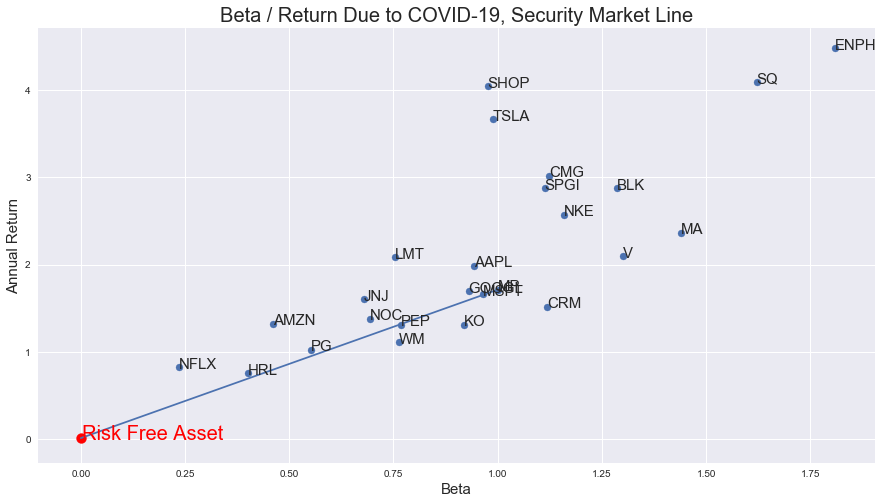

In [64]:
plt.figure(figsize = (15, 8))
plt.scatter(summary.beta, summary.Return)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "beta"]+0.00, summary.loc[i, "Return"]-0.015), size = 15)
plt.plot([rf[1], summary.loc["MP", "beta"]], [rf[0], summary.loc["MP", "Return"]])
plt.scatter(rf[1], rf[0], s = 100, marker = "o", c = "red")
plt.annotate("Risk Free Asset", xy = (rf[1] + 0.002, rf[0] - 0.02), size = 20, color = "Red")
plt.xlabel("Beta", fontsize = 15)
plt.ylabel("Annual Return", fontsize = 15)
plt.title("Beta / Return Due to COVID-19, Security Market Line", fontsize = 20)
plt.show()

Security Market Line Analysis: Stocks that fall below the SML is an indictor that they are underperforming the market. Meanwhile stocks above the SML indicate that they are outperforming the market.

### Including the Capital Asset Pricing Model and Alpha of the stocks with the Market Portfolio

The Capital Asset Pricing Model (CAPM) describes the relationship between systematic risk and expected return for assets, particularly stocks. CAPM is widely used throughout finance for pricing risky securities and generating expected returns for assets given the risk of those assets and cost of capital.

"Alpha" (the Greek letter α) is a term used in investing to describe a strategy's ability to beat the market, or it's "edge." Alpha is thus also often referred to as “excess return” or “abnormal rate of return,” which refers to the idea that markets are efficient, and so there is no way to systematically earn returns that exceed the broad market as a whole. Alpha is often used in conjunction with beta (the Greek letter β) , which measures the broad market's overall volatility or risk, known as systematic market risk

In [65]:
summary["capm_ret"] = rf[0] + (summary.loc["MP", "Return"] - rf[0]) * summary.beta

In [66]:
summary["alpha"] = summary.Return - summary.capm_ret
summary

,Return,Risk,Sharpe,TotalRisk_var,SystRisk_var,UnsystRisk_var,beta,capm_ret,alpha
AAPL,1.9885,0.4409,4.4806,0.1944,0.1627,0.0317,0.9422,1.6151,0.3734
AMZN,1.3248,0.3904,3.3599,0.1524,0.0798,0.0727,0.4618,0.7982,0.5266
BLK,2.8771,0.6674,4.2915,0.4454,0.2222,0.2233,1.2863,2.2002,0.6770
CMG,3.0171,0.6315,4.7568,0.3988,0.1941,0.2047,1.1238,1.9238,1.0933
CRM,1.5180,0.5627,2.6748,0.3166,0.1932,0.1234,1.1186,1.9152,-0.3972
ENPH,4.4778,1.1955,3.7346,1.4293,0.3125,1.1168,1.8092,3.0893,1.3885
GOOGL,1.6970,0.4593,3.6661,0.2110,0.1606,0.0504,0.9301,1.5945,0.1025
HRL,0.7568,0.3692,2.0148,0.1363,0.0691,0.0672,0.3998,0.6929,0.0639
JNJ,1.6057,0.3717,4.2849,0.1382,0.1171,0.0210,0.6782,1.1662,0.4395
KO,1.3125,0.4484,2.8981,0.2011,0.1587,0.0424,0.9189,1.5755,-0.2630


CAPM Analysis: Since we know that the CAPM is used for determining expected returns on stocks, we can notice that each stock is expected to reach positve returns, We can also notice that stocks with the highest betas are expected to have higher returns. This could of course change do to systematic condidtons.  

Alpha Analysis: Understanding that Alpha is used to determine whether or not a stock would beat the overall market. We can notice that stocks in the Portfolio that have a chance of not beating the over all market are the stocks below the Security Market Line.

## Financial Analysis of stocks below the SML regarding their current Financial Position
(Most Recent Quarter)

Although these stocks are below the SML and have negative alphas, that does not mean these are bad companies, however they could be experiencing some performance issues which is natural for this type of situation.Therefore understanding their balance sheets (financial position) will give us a better understanding on how to asset risk.

### Coca Cola: KO
Current Ratio: 0.87:1

Debt to Asset Ratio: 0.78:1

Retain Earnings: 66,870

### PepsiCo: PEP
Current Ratio: 1.09:1

Debt to Asset Ratio: 0.84:1

Retain Earnings: 61,920

### Waste Management: WM
Current Ratio: 1.83:1

Debt to Asset Ratio: 0.75:1

Retain Earnings: 10,718

### SalesForce:CRM
Current Ratio: 1.07:1

Debt to Asset Ratio: 0.38:1

Retain Earnings: 1,861

### Visa: V
Current Ratio: 1.24:1

Debt to Asset Ratio: 

Retain Earnings: 13,366

### Mastercard: MA
Current Ratio: 1.86:1

Debt to Asset Ratio: 0.82:1

Retain Earnings: 18,708

##### Retain Earnings Amount Is In Billions

## Financial Position Analysis: 
Current Ratio Analysis: stocks with a current ratio above 1 indicate that they would be able to comfortably pay off any short term debt obligation in case of an emergency, which is extremely important for a time like this, since we're going through a global recession / pandemic. If the ratio is below 1 this indicates the company has more short term debt than it does short term assets, therefore would struggle to pay off any short term obligations.

Debt to Asset Ratio Analysis: Debt to Asset is a leverage ratio that defines the total amount of debt relative to assets owned by a company. Using this metric, analysts can compare one company's leverage with that of other companies in the same industry. This information can reflect how financially stable a company is. The higher the ratio, the higher the degree of leverage (DoL) and, consequently, the higher the risk of investing in that company. if the ratio is above 1 that means the company has more debt than it does assets. the further it is away from 1, the healthier the company.

Retain Earnings Analysis: Retained earnings (RE) is the amount of net income left over for the business after it has paid out dividends to its shareholders. A business generates earnings that can be positive (profits) or negative (losses). Positive profits give a lot of room to the business owner(s) or the company management to utilize the surplus money earned. Often this profit is paid out to shareholders, but it can also be re-invested back into the company for growth purposes. 

#### Financial Statement information was gathered from SeekingAlpha
source:https://seekingalpha.com/